In [1]:
%pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

import math
import pandas as pd
import numpy as np

2024-12-18 10:06:28.489138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-18 10:06:28.507261: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-18 10:06:28.512697: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 10:06:28.526536: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-18 10:06:29.431947: W tensorflow/compiler/tf2

In [7]:
# Normalisierungsfunktion
def normalize_img(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normiere die Pixelwerte auf [0, 1]
    return image, label

# Datenverzeichnisse
train_dir = "./vehicles/train"
test_dir = "./vehicles/test"

# Trainingsdaten
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(128, 128),
    batch_size=32,  # Batchgröße definieren
    label_mode='categorical'  # One-Hot-Labels
)
train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.cache()
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

# Testdaten
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),
    batch_size=32,  # Batchgröße definieren
    label_mode='categorical'
)
test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache()
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

model = tf.keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')
])


# Modell kompilieren
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Passend für One-Hot-Labels
    metrics=['accuracy']
)

# Training
model.fit(
    train_dataset,
    epochs=25,
    validation_data=test_dataset
)

Found 384 files belonging to 7 classes.
Found 46 files belonging to 7 classes.
Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.1943 - loss: 170.2785 - val_accuracy: 0.2174 - val_loss: 1.8315
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2426 - loss: 1.8420 - val_accuracy: 0.2826 - val_loss: 1.7868
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5444 - loss: 1.2809 - val_accuracy: 0.3261 - val_loss: 1.7021
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7785 - loss: 0.8294 - val_accuracy: 0.3478 - val_loss: 2.5258
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8896 - loss: 0.4029 - val_accuracy: 0.3913 - val_loss: 2.0564
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9423 - loss: 0.2293 - val_accuracy: 0.3913 - val_loss: 2.4740
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9718 - loss: 0.0923 - val_accuracy: 0.5000 - val_loss: 2.5476
Epoch 8/25
12/12 ━━━━━━━━━━━━

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,916,631 (37.83 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,611,088 (25.22 MB)

In [9]:
test_images = []
test_labels = []

for images, labels in test_dataset:
    test_images.append(images)
    test_labels.append(labels)

# Stapel alle Batches in ein Tensor zusammen
test_images = tf.concat(test_images, axis=0)
test_labels = tf.concat(test_labels, axis=0)

2024-12-18 10:07:18.380164: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step


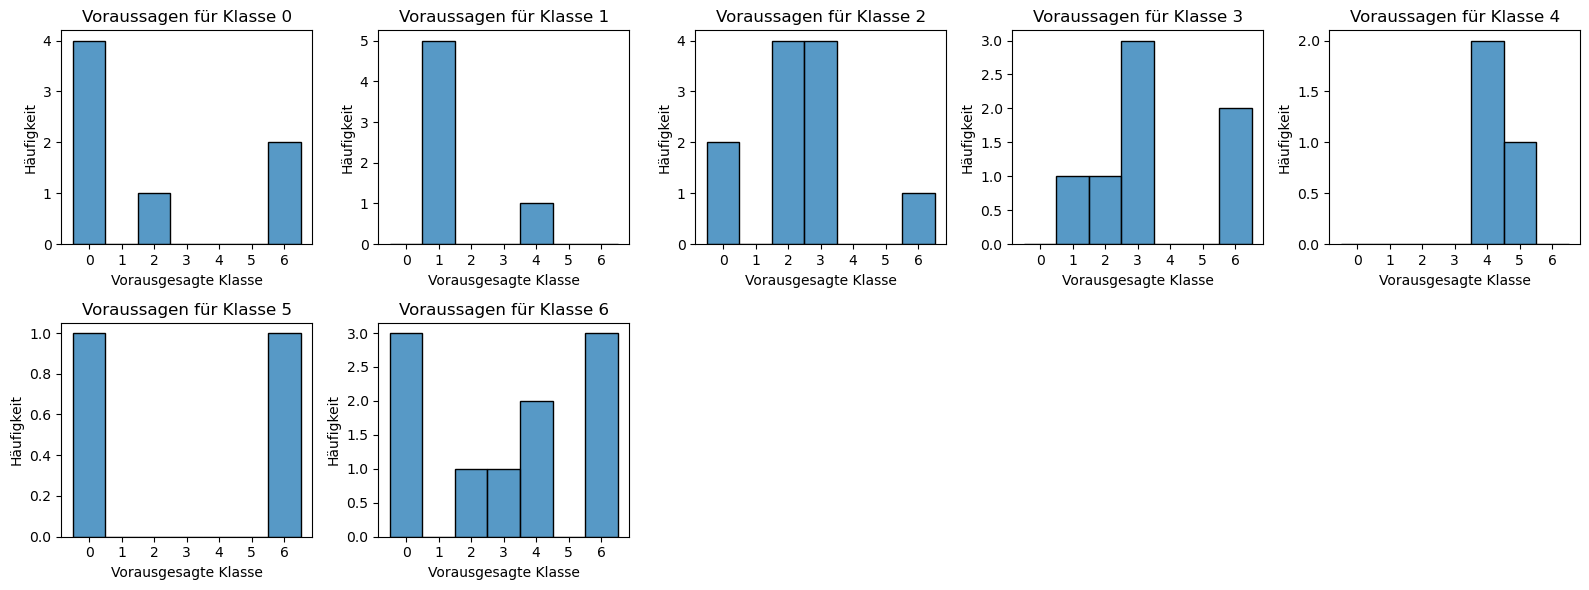

In [10]:
# Konvertiere One-Hot-Encoded Labels in eindimensionale Labels
true_labels = np.argmax(test_labels.numpy(), axis=1)
# Vorhersagen für die Testdaten
predictions = model.predict(test_images)

# Extrahiere die vorhergesagten Klassen (höchste Wahrscheinlichkeit)
predicted_labels = np.argmax(predictions, axis=1)

# Erstelle den DataFrame
results_df = pd.DataFrame({
    'True Label': true_labels,
    'Predicted Label': predicted_labels
})

plt.figure(figsize=(16, 6))
for i in range(7):  # Annahme: 7 Klassen
    plt.subplot(2, 5, i + 1)
    sns.histplot(results_df[results_df['True Label'] == i]['Predicted Label'], bins=np.arange(8) - 0.5)
    plt.title(f'Voraussagen für Klasse {i}')
    plt.xlabel('Vorausgesagte Klasse')
    plt.ylabel('Häufigkeit')
    plt.xticks(range(7))
plt.tight_layout()
plt.show()